# Assignment 2
### General Instructions
  + The Python standard library is not enough to do solve these questions. You will need to import appropriate libraries for each task. Generally, you might import and use any library you wish unless otherwise stated. 
  + Where detail instructions like variable or function names, required libraries, and etc are not given by the question, feel free to do it the way you would like to.
  + After each question, add the needed number of new cells and place your answers inside the cells. 
  + When you are required to explain or answer in text format open a Markdown cell and enter your answer in it.
  + Do not remove or modify the original cells provided by the instructor.
  + Comment your code whenever needed using # sign at the beginning of the row.
  + Do not hesitate to communicate your questions to the TAs or instructors. Good luck! 

In [1]:
# The following piece of code gives the opportunity to show multiple outputs
# in one cell:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


# Colorful outputs
class bcolors:
    RED       = '\033[91m'
    OKBLUE    = '\033[94m'
    BOLD      = '\033[1m'
    UNDERLINE = '\033[4m'
    ENDC      = '\033[0m'

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(style="ticks")
sns.set(rc={'figure.figsize':(11.7,8.27)})
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm
from scipy.stats import randint
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
import sklearn.metrics as metrics

## Question 1 <span style="color:red">(40 points)</span>

#### 1.  Download `Income2.csv` from http://www-bcf.usc.edu/~gareth/ISL/Income2.csv

#### 2.  Load the data into this Jupyter notebook. 

In [3]:
income = pd.read_csv(r"C:\Users\Nicolas\Documents\YCBS 253\income2.csv", index_col=0)

#### 3.  Describe the data using descriptive statistics such as measures of central tendancy, dispersion or association.

In [4]:
income.head()

,Education,Seniority,Income
1,21.586207,113.103448,99.917173
2,18.275862,119.310345,92.579135
3,12.068966,100.689655,34.678727
4,17.034483,187.586207,78.702806
5,19.931034,20.000000,68.009922


It's interesting to see here that `Education` is a float variable.

In [5]:
income.describe()

,Education,Seniority,Income
count,30.000000,30.000000,30.000000
mean,16.386207,93.862069,62.744733
std,3.810622,55.715623,27.013285
min,10.000000,20.000000,17.613593
25%,12.482759,44.827586,36.392043
50%,17.034483,94.482759,70.804791
75%,19.931034,133.275862,85.930608
max,21.586207,187.586207,99.917173


In [6]:
income.corr()

,Education,Seniority,Income
Education,1.000000,0.194515,0.901003
Seniority,0.194515,1.000000,0.518288
Income,0.901003,0.518288,1.000000


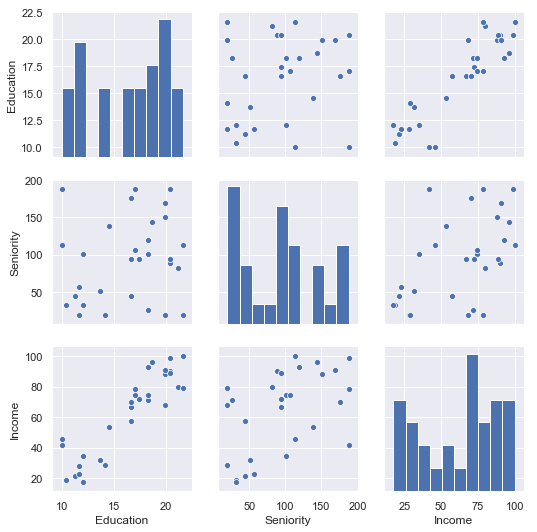

In [7]:
sns.pairplot(income)

In [8]:
income.isnull().sum()

Education    0
Seniority    0
Income       0
dtype: int64

#### 4.  Explore the data by vizualing it through various figures. Clearly explain or interpret each figure, justify the appropriateness of the tool used for visualization, highlight the information it provides, and, finally, explain how this information affect your further analysis.

Let's take this opportunity to inspect relationships from the plot above a little closer. A scatterplot would reveal any kind of relationship between variables. In fact, it can often reveal much more than descriptive statistics, which can fail to detect certain relationship (e.g., quadratic). 

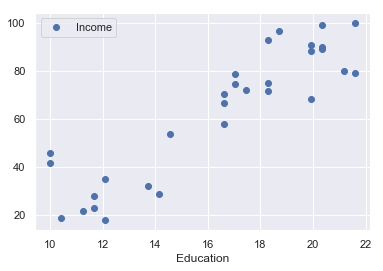

In [9]:
income.plot(x='Education', y='Income', style='o')

Education seems moderately positively associated with income. Let's determine how string this relationship really is.

In [10]:
income['Income'].corr(income["Education"])

0.9010032722872089

That's pretty strong relationship. Further regression analyses will tell `Education` uniquely predicts `Income`. From the scattermatrix above, it also seemed like seniority was weakly associated with income. Let's take a closer look with a scatterplot again.

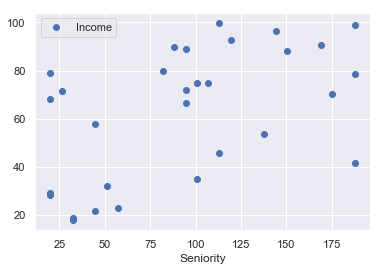

In [11]:
income.plot(x='Seniority', y='Income', style='o')

In [12]:
income['Income'].corr(income["Seniority"])

0.5182881203612878

For social sciences, this is a pretty high correlation. Let's inspect this gap in the middle range of incomes.

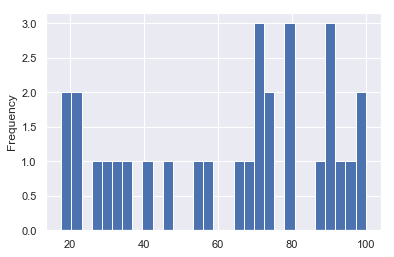

In [13]:
income.Income.plot(kind='hist', bins=30)

There is indeed a strange pattern. Many people are in the high range of income, and the low. But few are in between. Let's look at this weird plot from the first column.

#### 5.	Model `Income` as a linear function of `Years of Education`. What are your independent and dependent variables? What type of model did you use? Why?

In [14]:
X = income.Education
Y = income.Income
model = sm.OLS(Y, X)
results = model.fit()

I used a regression model because this is the proper way to estimate how an independent variable predicts a dependent variable. In this case, the dependent variable is the income, and the independent variable is education. 

#### 6.  Scatterplot the dependent and independent variables used in the model versus each other. Based on the scatterplot, do you think a linear model is an adequate model for the data in hand? Discuss your answer. 

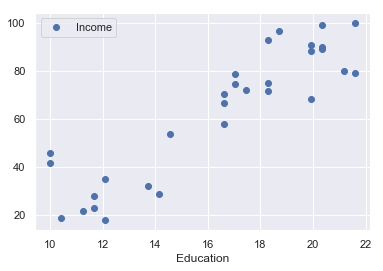

In [15]:
income.plot(x='Education', y='Income', style='o')

Yes, I believe a linear model is appropriate. The relationship seems linear. In a perfect world, there wouldn't be the two observations above 40 at x = 10. Without necessarily being outliers, these are definitely extreme values, or influential values

#### 7.  Print the slope of the fitted line out and provide a $95\%$ confidence interval for the estimate slope.

In [16]:
pd.DataFrame(results.params, columns=["Slope"])
results.conf_int(0.05)

,Slope
Education,3.956202


,0,1
Education,3.621045,4.29136


#### 8.  Add the fitted line over the scatterplot.

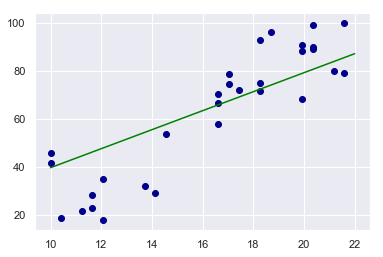

In [17]:
ax=plt.scatter(income.Education, income.Income, color="darkblue")
x = np.arange(10, 23)
plt.plot(x, results.params[0]*x, color="green")

#### 9.  Using the **discrete uniform** distribution, randomly generate $10$ numbers between the $25$ and $75$ percentiles of the variable `Years of Education` in the original data. If these numbers represent years of education for $10$ employees, then predict each person's `Income` due to your model.

In [18]:
income.Education.describe()[[4, 6]]

25%    12.482759
75%    19.931034
Name: Education, dtype: float64

In [19]:
numbers = randint(12.48, 19.93).rvs(10)
numbers

array([15, 17, 12, 14, 13, 17, 15, 12, 12, 12])

In [20]:
predictions = results.predict(numbers)
predictions

array([59.34303503, 67.2554397 , 47.47442802, 55.38683269, 51.43063036,
       67.2554397 , 59.34303503, 47.47442802, 47.47442802, 47.47442802])

#### 10. Now, model  `Income` as a linear function of both `Years of Education` and `Seniority`. What type of model did you use? How many parameters (coefficients) does this model have? 

In [21]:
X = income[["Education", "Seniority"]]
Y = income.Income
model = sm.OLS(Y,X)
results = model.fit()
predictions = results.predict(X)
predictions.head()

1    84.403574
2    74.607219
3    52.195475
4    79.746513
5    66.648891
dtype: float64

This is a multiple regression model, and there are two independent variables. There is no constant. 

#### 11. Print out the estimated coefficients after the model has been fitted.

In [22]:
results.params

Education    3.209879
Seniority    0.133634
dtype: float64

#### 12. How much would be the `Income` of a new individual with $18$ years of education and $60$ years of seniority?

In [23]:
results.params[0]*18 + results.params[1]*60

65.79586076723193

It is estimated that this person would make around $65.8k.

#### 13.	Argue which of `Years of Education` or `Seniority` is a stronger predictor of `Income`? Justify your comparison. (**Hint**: take into consideration that these variables are in different units)

In [24]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Income   R-squared:                       0.964
Model:                            OLS   Adj. R-squared:                  0.962
Method:                 Least Squares   F-statistic:                     376.4
Date:                Fri, 05 Apr 2019   Prob (F-statistic):           5.83e-21
Time:                        09:27:35   Log-Likelihood:                -119.29
No. Observations:                  30   AIC:                             242.6
Df Residuals:                      28   BIC:                             245.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Education      3.2099      0.288     11.148      0.000       2.620       3.800
Seniority      0.1336      0.045      3.001      0.006       0.042       0.225
==============================================================================
Omnibus:                        4.630   Durbin-Watson:                   2.360
Prob(Omnibus):                  0.099   Jarque-Bera (JB):                1.924
Skew:                          -0.250   Prob(JB):                        0.382
Kurtosis:                       1.864   Cond. No.                         13.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [25]:
education_coef = 0.288/3.2099
seniority_coef = 0.045/0.1336
print("education standardized coef:", education_coef)
print("seniority standardized coef:", seniority_coef)

education standardized coef: 0.08972242125922925
seniority standardized coef: 0.33682634730538924


Education is a better predictor because it's standard error is smaller. In other words, the observations are closer to the estimated coefficient. It is therefore predicting income with better accuracy.

## Question 2 <span style="color:red">(30 points)</span>

#### 1.  Download `Credit.csv` from http://www-bcf.usc.edu/~gareth/ISL/Credit.csv

#### 2.  Load the data into this Jupyter notebook. 

In [26]:
credit = pd.read_csv(r"C:\Users\Nicolas\Documents\YCBS 253\Credit.csv", index_col=0)

#### 3.  Describe the data using descriptive statistics such as measures of central tendancy, dispersion or association.

In [27]:
credit.head()

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
3,104.593,7075,514,4,71,11,Male,No,No,Asian,580
4,148.924,9504,681,3,36,11,Female,No,No,Asian,964
5,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


Important things to see here are that there are float, string, and integer variables. In the next steps, we will need to take this into consideration. Also, let's find out how many of these categorial values there are.

In [28]:
credit.Gender.value_counts()

Female    207
Male      193
Name: Gender, dtype: int64

Now the same thing for ethnicity.

In [29]:
credit.Ethnicity.value_counts()

Caucasian           199
Asian               102
African American     99
Name: Ethnicity, dtype: int64

Let's inspect more general descriptions such as mean and standard deviation.

In [30]:
credit.describe()

,Income,Limit,Rating,Cards,Age,Education,Balance
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,45.218885,4735.600000,354.940000,2.957500,55.667500,13.450000,520.015000
std,35.244273,2308.198848,154.724143,1.371275,17.249807,3.125207,459.758877
min,10.354000,855.000000,93.000000,1.000000,23.000000,5.000000,0.000000
25%,21.007250,3088.000000,247.250000,2.000000,41.750000,11.000000,68.750000
50%,33.115500,4622.500000,344.000000,3.000000,56.000000,14.000000,459.500000
75%,57.470750,5872.750000,437.250000,4.000000,70.000000,16.000000,863.000000
max,186.634000,13913.000000,982.000000,9.000000,98.000000,20.000000,1999.000000


#### 4.  Explore the data by vizualing it through various figures. Clearly explain or interpret each figure, justify the appropriateness of the tool used for visualization, highlight the information it provides, and, finally, explain how this information affect your further analysis.

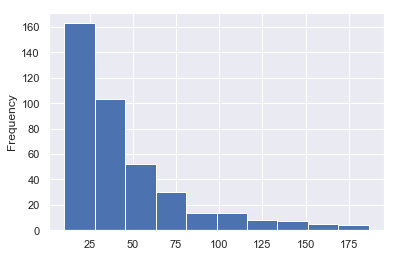

In [31]:
credit.Income.plot(kind="hist")

Here, the histogram makes the most sense. We want to see the frequency of each bracket of income. We can quickly have an overview of what the data has to say. More specifically, we can see that income data is right skewed, but that a large majority of the observations reside close to zero, unfortunately. 

Before visualizing the "Limit" variable, we should inspect how many values there are. The reasoning behind this is to use a little domain-specific knowledge. There are usually a limited number of credit limits, such as \\$1000, \\$5000, etc. So let's find out!

In [32]:
credit.Limit.value_counts().head()

2525    2
2120    2
2860    2
5673    2
3907    2
Name: Limit, dtype: int64

I was wrong! So let's look at how the data is distributed. Again, the histogram makes more sense, for the same reasons covered for the first variable.

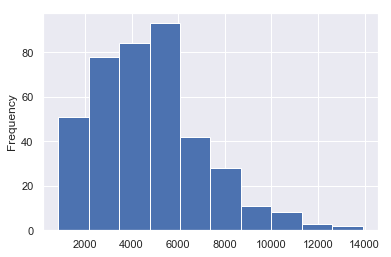

In [33]:
credit.Limit.plot(kind="hist")

The majority of credit limits is concentrated before 5,000 and the mode seems to be around 5,000 too.

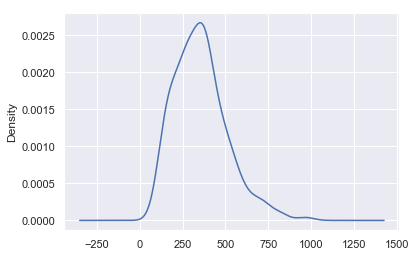

In [34]:
credit.Rating.plot(kind="density")

I went for a density plot this time. We lose a little information when it comes to quantity of observations, but we get a smoother curve. 

For the next plot, there may be only a few integer values. One can't have half a credit card. So let's find out before plotting it. If there are only a few I will make a histogram with the same number of bins. 

In [35]:
print("There are", str(len(credit.Cards.value_counts())), "values for this variable.") 

There are 9 values for this variable.


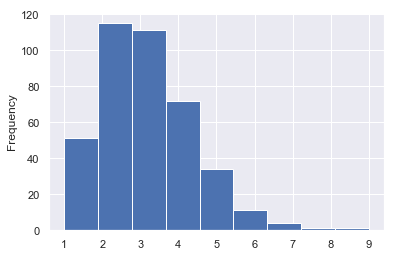

In [36]:
credit.Cards.plot(kind="hist", bins=9)

#### 5.  Which variables of this dataset are **qualitative** and which ones are **quantitative**? Create an attribute (also called design) matrix  $\mathbf{X}$ that includes only the following attributes:`Income`, `Limit`, `Rating`, `Cards`, `Age`, and `Education`.

In [37]:
credit.columns

Index(['Income', 'Limit', 'Rating', 'Cards', 'Age', 'Education', 'Gender',
       'Student', 'Married', 'Ethnicity', 'Balance'],
      dtype='object')

Gender, student, married, and ethnicity are qualitative. The rest are quantitative. Let's take a look.

In [38]:
df_qual = credit[["Gender", "Student", "Married", "Ethnicity"]]
df_qual.head(3)

,Gender,Student,Married,Ethnicity
1,Male,No,Yes,Caucasian
2,Female,Yes,Yes,Asian
3,Male,No,No,Asian


In [39]:
X = credit[['Income', 'Limit', 'Rating', 'Cards', 'Age', 'Education']]
X.head()
X = np.matrix(X)
X

,Income,Limit,Rating,Cards,Age,Education
1,14.891,3606,283,2,34,11
2,106.025,6645,483,3,82,15
3,104.593,7075,514,4,71,11
4,148.924,9504,681,3,36,11
5,55.882,4897,357,2,68,16


matrix([[1.48910e+01, 3.60600e+03, 2.83000e+02, 2.00000e+00, 3.40000e+01,
         1.10000e+01],
        [1.06025e+02, 6.64500e+03, 4.83000e+02, 3.00000e+00, 8.20000e+01,
         1.50000e+01],
        [1.04593e+02, 7.07500e+03, 5.14000e+02, 4.00000e+00, 7.10000e+01,
         1.10000e+01],
        ...,
        [5.78720e+01, 4.17100e+03, 3.21000e+02, 5.00000e+00, 6.70000e+01,
         1.20000e+01],
        [3.77280e+01, 2.52500e+03, 1.92000e+02, 1.00000e+00, 4.40000e+01,
         1.30000e+01],
        [1.87010e+01, 5.52400e+03, 4.15000e+02, 5.00000e+00, 6.40000e+01,
         7.00000e+00]])

#### 6.  Create a binary variable `Balance_1500` which equals $1$ for each observation if `Balance` $> 1500$ for that observation and equals $0$ otherwise.

In [40]:
Balance_1500 = (credit.Balance > 1500)*1
Balance_1500.head()
print("Proportion of balance above 1500: " + str(Balance_1500.sum()) + "/" + str(len(Balance_1500)))

1    0
2    0
3    0
4    0
5    0
Name: Balance, dtype: int32

Proportion of balance above 1500: 9/400


#### 7.  Model `Balance_1500` by the explanatory variables mentionned in Step 5 using the following models: 

    + logistic regression

In [41]:
clf_log = LogisticRegression()
clf_log.fit(X, Balance_1500)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

    + linear discriminant

In [42]:
clf_lin = LinearDiscriminantAnalysis()
clf_lin.fit(X, Balance_1500)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001)

    + quadratic discriminant.

In [43]:
clf_quad = QuadraticDiscriminantAnalysis()
clf_quad.fit(X, Balance_1500)

QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
               store_covariance=False, store_covariances=None, tol=0.0001)

#### 8. Interpret the coefficients of `Income`, `Age`, and `Education` for the logistic regression model.    

In [44]:
clf_log.coef_

array([[-0.00950572,  0.00499434, -0.05897994,  0.11851539, -0.05977501,
        -0.35404606]])

In a logistic regression model, each estimated coefficient is the expected change in the log odds of having a balance above 1500 for a unit increase in the predictor variable, holding the other predictor variables constant. 

The coefficient for `Education` says that, keeping other variables constant, as `Education` goes up by 1, the log odds of having a balance above 1500 decreases by 0.35. 

Similarly, the coefficient for `Income` says that, keeping other variables constant, as `Income` goes up by 1, the log odds of having a balance above 1500 decreases by 0.009.

The coefficient for `Age` says that, keeping other variables constant, as `Age` goes up by 1, the log odds of having a balance above 1500 decreases by 0.059.

#### 9. Find the probability of (`Balance` $> 1500$), for the following values, using all three aforementionned methods:

|    Income    |    Limit     |     Rating     |    Cards     |      Age        |   Education   | 
|--------------|--------------|----------------|--------------|-----------------|---------------|
|      63      |    8100      |     600        |      4       |       30        |      13       |
|     186      |    13414     |     950        |      2       |       41        |      13       |

    Compare the probabilities and comment.
    

In [45]:
balance_df = pd.DataFrame({'Income': [63, 186], 'Limit': [8100, 13414], "Rating": [600, 950], 
                           "Cards": [4, 2], "Age": [30, 41], "Education": [13, 13]})
balance_matrix = np.matrix(balance_df)
balance_matrix

matrix([[   63,  8100,   600,     4,    30,    13],
        [  186, 13414,   950,     2,    41,    13]], dtype=int64)

In [46]:
clf_lin.predict_proba(balance_matrix)
clf_quad.predict_proba(balance_matrix)
clf_log.predict_proba(balance_matrix)

array([[0.94050988, 0.05949012],
       [0.00721199, 0.99278801]])

array([[9.99999995e-01, 4.93626009e-09],
       [7.83057752e-04, 9.99216942e-01]])

array([[0.90620121, 0.09379879],
       [0.1729211 , 0.8270789 ]])

#### 10. For each method, print the confusion matrix, the accuracy score and the AUC using all observations. Compare these metrics and comment. 

a) Linear Discriminant

In [47]:
confusion_matrix(Balance_1500, clf_lin.predict(X))

array([[383,   8],
       [  4,   5]], dtype=int64)

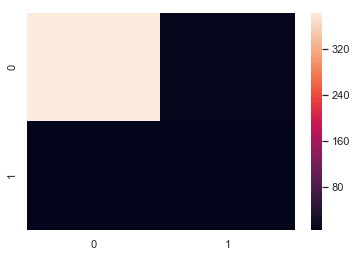

In [48]:
sns.heatmap(confusion_matrix(Balance_1500, clf_lin.predict(X)))

The heatmap is a common tool to visualize confusion matrices, but doesn't yield much information here. I won't plot it for the next two examples.

In [49]:
accuracy_score(Balance_1500, clf_lin.predict(X))

0.97

In [50]:
roc_auc_score(Balance_1500, clf_lin.predict(X))

0.7675475987496447

b) Quadratic Discriminant

In [51]:
confusion_matrix(Balance_1500, clf_quad.predict(X))

array([[390,   1],
       [  2,   7]], dtype=int64)

In [52]:
accuracy_score(Balance_1500, clf_quad.predict(X))

0.9925

In [53]:
roc_auc_score(Balance_1500, clf_quad.predict(X))

0.8876101165103721

C) Logistic Regression

In [54]:
confusion_matrix(Balance_1500, clf_log.predict(X))

array([[390,   1],
       [  6,   3]], dtype=int64)

In [55]:
accuracy_score(Balance_1500, clf_log.predict(X))

0.9825

In [56]:
roc_auc_score(Balance_1500, clf_log.predict(X))

0.6653878942881499

Let's begin with a few definitions.

The confusion matrix prints the true and false positives, and true and false negatives. 

The accuracy score is the proportion of true positives.

The AUC of a classifier is equal to the probability that the classifier will rank a randomly chosen positive example higher than a randomly chosen negative example

The AUC is more easily comparable between models. 

#### 11. Plot the ROC Curve of the three methods on the same figure. Comment.

a) Linear Discriminant

Text(0.5,1,'ROC Curve')

Text(0,0.5,'True Positive Rate')

Text(0.5,0,'False Positive Rate')

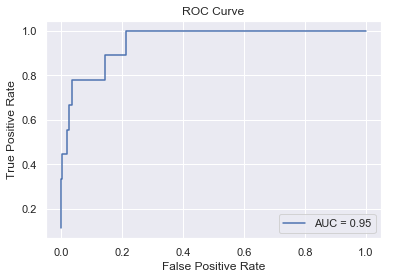

In [57]:
probs = clf_lin.predict_proba(X)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(Balance_1500, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.title('ROC Curve')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

b) Quadratic Discriminant

Text(0.5,1,'ROC Curve')

Text(0,0.5,'True Positive Rate')

Text(0.5,0,'False Positive Rate')

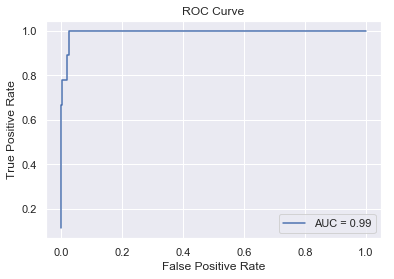

In [58]:
probs = clf_quad.predict_proba(X)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(Balance_1500, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.title('ROC Curve')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

c) Logistic Regression

Text(0.5,1,'ROC Curve')

Text(0,0.5,'True Positive Rate')

Text(0.5,0,'False Positive Rate')

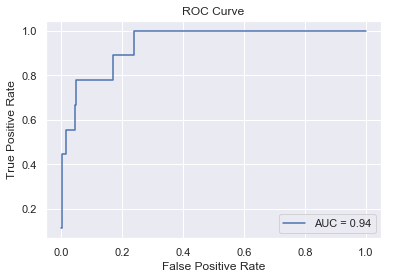

In [59]:
probs = clf_log.predict_proba(X)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(Balance_1500, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.title('ROC Curve')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

As mirrored by the superior accuracy score of the quadratic discriminant model, it yields the highest AUC. The area measures discrimination, or the ability of the test to correctly classify those with and without a balance over $1500.

## Question 3 <span style="color:red">(30 points)</span>

#### 1. From the dataset `Credit.csv`, extract the variable `Student` and save it as `Student`. 

In [60]:
Student = credit.Student
Student.head()

1     No
2    Yes
3     No
4     No
5     No
Name: Student, dtype: object

#### 2. Save the number of observations in `Student` as `population_size`.

In [61]:
population_size = len(Student)
population_size

400

#### 3. Factorize `Student` and compute the proportion of "students" and save it as `true_p`. 

Let us consider the following simple logistic regression model

$$ \mathrm{Pr}(\mathrm{Student = Yes}) = \frac{e^{\beta}}{1 + e^{\beta}}. $$

Here, we do not consider any predictor. The objective is to estimate $\beta$ by manipulating the likelihood of the model.

In [62]:
true_p = (Student == "Yes")*1
sum(true_p)/population_size
sum(true_p)

0.1

40

#### 4. Define a variable `sample_size` $=100$. Now sample `sample_size` number of observations from `Student` and call it `sample`.

In [63]:
sample_size = 100
sample = np.random.choice(Student, sample_size)

#### 5. Define a function called `likelihood` which takes one argument `beta` and computes the likelihood of `beta` based on the `sample`.  

In [64]:
def likelihood(beta):
    likelihood = beta/sum((Student == "Yes")*1)
    return likelihood

#### 6. Randomly generate $50$ numbers from the **continuous uniform** distribution $U[-5;5]$. Save these numbers as `beta_candidate`.

In [65]:
beta_candidate = np.random.uniform(-5, 5, 50)

#### 7. Using the `likelihood` function defined in Step 5, compute the likelihood of `beta_candidate` and save it as `likelihood_candidate`. Plot the `likelihood_candidate` versus `beta_candidate`.

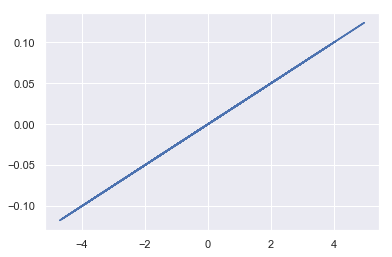

In [66]:
likelihood_candidate = []
for number in beta_candidate:
    likelihood_candidate.append(likelihood(number))
plt.plot(beta_candidate, likelihood_candidate)

#### 8. Based on the plot, which value of `beta_candidate` would you choose as the estimate of $\beta$ ? Explain why.

I would choose the largest value of beta_candidate

In [67]:
max(beta_candidate)

4.963104937215251

#### 9. Based on the chosen `beta_candidate`, estimate the `true_p` (or $\mathrm{Pr}(\mathrm{Student = Yes})$ ).

In [68]:
likelihood(4.87)

0.12175